# Importation des librairies

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLarsIC, LassoLars, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, \
ARDRegression, SGDRegressor, PassiveAggressiveRegressor, QuantileRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV

# Chargement des données

In [2]:
df = pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
# Afficher toutes les colonnes 
pd.set_option('display.max_columns', None)
# Afficher toutes les lignes 
pd.set_option('display.max_rows', None)
# Définir la largeur d'affichage maximale
pd.set_option('display.max_colwidth', None)

# Nettoyage et analyse

In [4]:
# Récupérer les infos sur les colonnes et leurs entrées
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
# Récupération des statistiques générales du Dataframe
df.describe(include='all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

In [6]:
df[df.TotalGHGEmissions == df.TotalGHGEmissions.max()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2979090.0,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09


In [7]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
df.shape

(3376, 46)

In [9]:
# Recherche de valeurs nulls
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [10]:
# Recherche de valeurs manquantes
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [11]:
df.count()

OSEBuildingID                      3376
DataYear                           3376
BuildingType                       3376
PrimaryPropertyType                3376
PropertyName                       3376
Address                            3376
City                               3376
State                              3376
ZipCode                            3360
TaxParcelIdentificationNumber      3376
CouncilDistrictCode                3376
Neighborhood                       3376
Latitude                           3376
Longitude                          3376
YearBuilt                          3376
NumberofBuildings                  3368
NumberofFloors                     3376
PropertyGFATotal                   3376
PropertyGFAParking                 3376
PropertyGFABuilding(s)             3376
ListOfAllPropertyUseTypes          3367
LargestPropertyUseType             3356
LargestPropertyUseTypeGFA          3356
SecondLargestPropertyUseType       1679
SecondLargestPropertyUseTypeGFA    1679


In [12]:
# filtre les données d'un DataFrame df en excluant toutes les lignes où la colonne 'BuildingType' contient le mot "Multifamily".
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [13]:
# filtre les données d'un DataFrame df en excluant toutes les lignes où la colonne 'PrimaryPropertyType' a la valeur "Low-Rise Multifamily".
df = df[df.PrimaryPropertyType != "Low-Rise Multifamily"]

In [14]:
df.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [15]:
df.LargestPropertyUseType.isna().sum()

6

In [42]:
# Filtre toutes les lignes de la colonne Electricity(kWh) en supprimant les valeurs inéfrieur à 0
df = df[df['Electricity(kWh)']>0]

KeyError: 'Electricity(kWh)'

<Axes: title={'center': 'Nombre de NaN en fonction de la colonne'}>

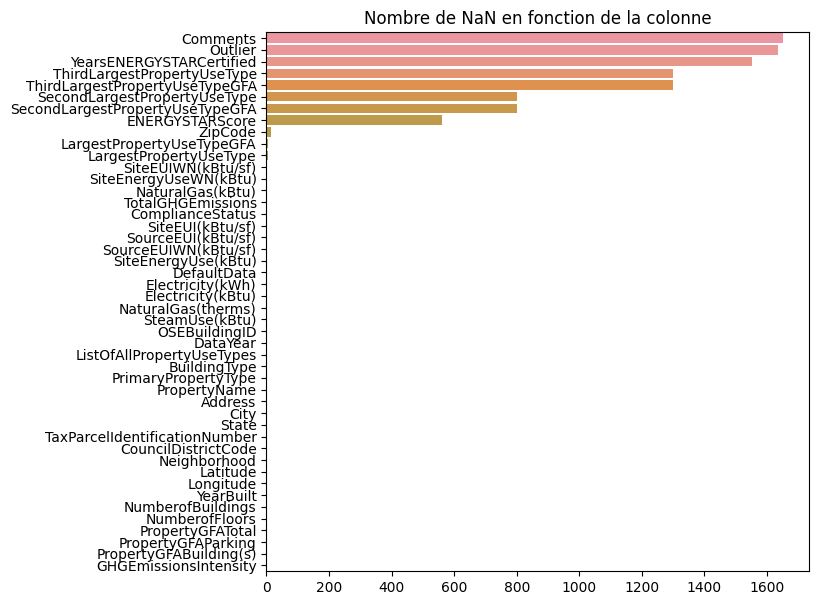

In [17]:
plt.figure(figsize=(7,7))
plt.title('Nombre de NaN en fonction de la colonne')
sns.barplot(x=df.isna().sum().sort_values(ascending=False).values, y=df.isna().sum().sort_values(ascending=False).index)

In [18]:
# Suppresion de colonne non exploitable
df = df.drop(["Comments",'OSEBuildingID', 'DataYear','PropertyName', 'City', 'State','TaxParcelIdentificationNumber',
             'ListOfAllPropertyUseTypes','YearsENERGYSTARCertified', 'ENERGYSTARScore','DefaultData', 'ComplianceStatus', 
             'Outlier'], axis=1)

In [19]:
df['LargestPropertyUseType'].fillna(df.PrimaryPropertyType, inplace=True)
df['LargestPropertyUseTypeGFA'].fillna(df["PropertyGFABuilding(s)"], inplace=True)
df['SecondLargestPropertyUseType'].fillna("None", inplace=True)
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['ThirdLargestPropertyUseType'].fillna("None", inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

<Axes: title={'center': 'Nombre de NaN en fonction de la colonne'}>

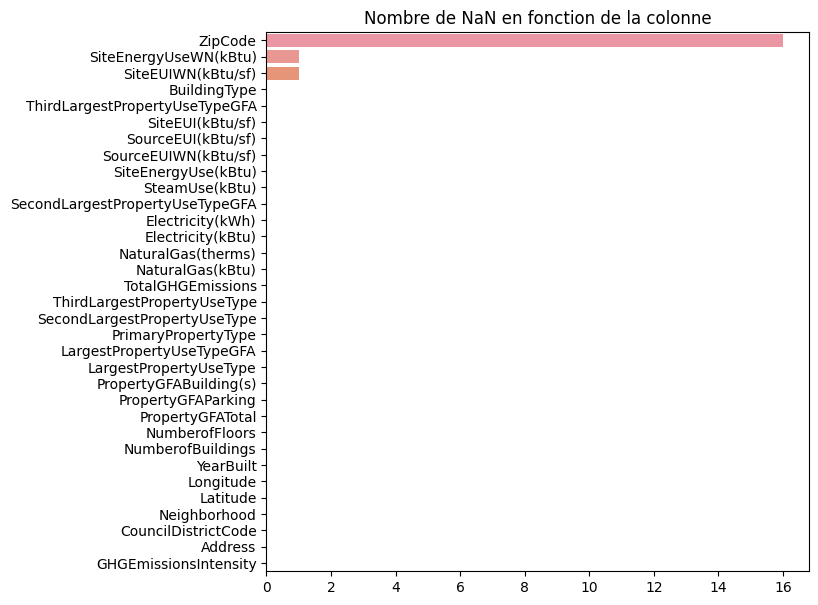

In [20]:
plt.figure(figsize=(7,7))
plt.title('Nombre de NaN en fonction de la colonne')
sns.barplot(x=df.isna().sum().sort_values(ascending=False).values, y=df.isna().sum().sort_values(ascending=False).index)

In [21]:
df = df[~df.TotalGHGEmissions.isnull()]

In [22]:
import folium
map = folium.Map()
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
                      popup=df.iloc[i]['Address'], radius =100).add_to(map)
map

In [23]:
df = df[~df.TotalGHGEmissions.isnull()]

# Analyse multivariée

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Hotel'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Mixed Use Property'),
  Text(3, 0, 'K-12 School'),
  Text(4, 0, 'University'),
  Text(5, 0, 'Small- and Mid-Sized Office'),
  Text(6, 0, 'Self-Storage Facility'),
  Text(7, 0, 'Warehouse'),
  Text(8, 0, 'Large Office'),
  Text(9, 0, 'Senior Care Community'),
  Text(10, 0, 'Medical Office'),
  Text(11, 0, 'Retail Store'),
  Text(12, 0, 'Hospital'),
  Text(13, 0, 'Residence Hall'),
  Text(14, 0, 'Distribution Center'),
  Text(15, 0, 'Worship Facility'),
  Text(16, 0, 'Supermarket / Grocery Store'),
  Text(17, 0, 'Laboratory'),
  Text(18, 0, 'Refrigerated Warehouse'),
  Text(19, 0, 'Restaurant'),
  Text(20, 0, 'Office')])

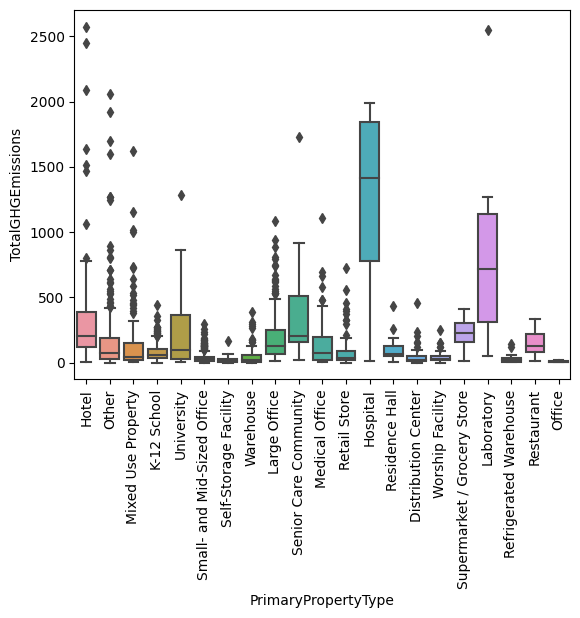

In [25]:
sns.boxplot(x = df.PrimaryPropertyType, y = df[df['TotalGHGEmissions']<3000]["TotalGHGEmissions"])
plt.xticks(rotation = 90)

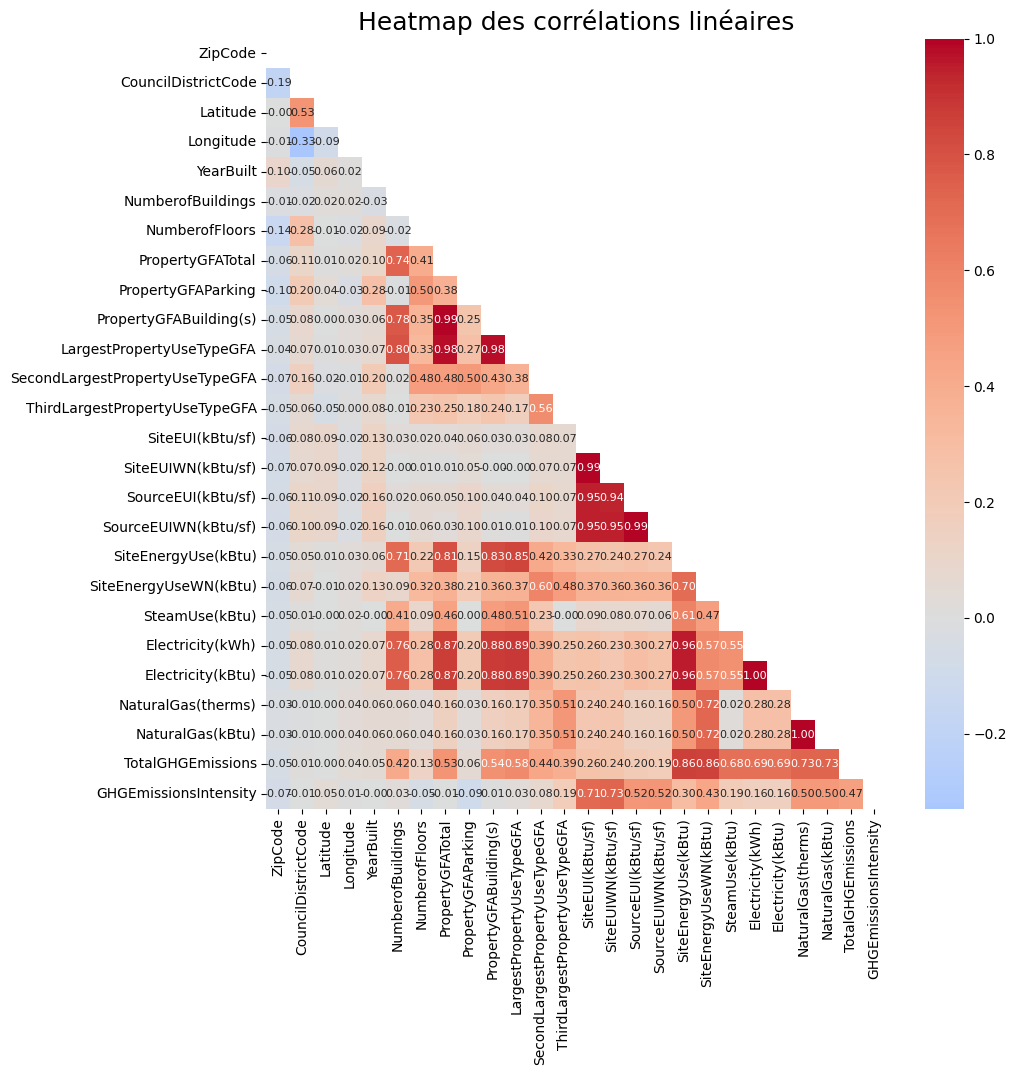

In [26]:
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires", fontsize = 18)
plt.show()

# Feature Ingeneering

In [27]:
ppt_dummies = pd.get_dummies(df.PrimaryPropertyType,dtype=float)
lput_dummies = pd.get_dummies(df.LargestPropertyUseType,dtype=float)
sput_dummies = pd.get_dummies(df.SecondLargestPropertyUseType,dtype=float)
tput_dummies = pd.get_dummies(df.ThirdLargestPropertyUseType,dtype=float)

nh_dummies = pd.get_dummies(df.Neighborhood,dtype=float)
bt_dummies = pd.get_dummies(df.BuildingType,dtype=float)

multiplier = df['LargestPropertyUseTypeGFA']
lput_dummies = lput_dummies.multiply(multiplier, axis='index')

multiplier2 = df['SecondLargestPropertyUseTypeGFA']
sput_dummies = sput_dummies.multiply(multiplier2, axis='index')

multiplier3 = df['ThirdLargestPropertyUseTypeGFA']
tput_dummies = tput_dummies.multiply(multiplier3, axis='index')

In [28]:
test_dum = lput_dummies.add(sput_dummies, fill_value=0).add(tput_dummies, fill_value=0)
column_sums = test_dum.sum()
df= df.join(test_dum).join(nh_dummies).join(bt_dummies)

In [29]:
bad_str = ['/','-',' ','(',')',',','&']
for bad in bad_str : 
    df.columns = df.columns.str.replace(bad, '')

In [ ]:
df.head(10)

# Features test

In [30]:
col_str = '+'.join(df.columns.unique().to_list())
col_str

'BuildingType+PrimaryPropertyType+Address+ZipCode+CouncilDistrictCode+Neighborhood+Latitude+Longitude+YearBuilt+NumberofBuildings+NumberofFloors+PropertyGFATotal+PropertyGFAParking+PropertyGFABuildings+LargestPropertyUseType+LargestPropertyUseTypeGFA+SecondLargestPropertyUseType+SecondLargestPropertyUseTypeGFA+ThirdLargestPropertyUseType+ThirdLargestPropertyUseTypeGFA+SiteEUIkBtusf+SiteEUIWNkBtusf+SourceEUIkBtusf+SourceEUIWNkBtusf+SiteEnergyUsekBtu+SiteEnergyUseWNkBtu+SteamUsekBtu+ElectricitykWh+ElectricitykBtu+NaturalGastherms+NaturalGaskBtu+TotalGHGEmissions+GHGEmissionsIntensity+AdultEducation+AutomobileDealership+BankBranch+BarNightclub+CollegeUniversity+ConvenienceStorewithoutGasStation+Courthouse+DataCenter+DistributionCenter+EnclosedMall+FastFoodRestaurant+FinancialOffice+FireStation+FitnessCenterHealthClubGym+FoodSales+FoodService+HospitalGeneralMedicalSurgical+Hotel+K12School+Laboratory+Library+LifestyleCenter+ManufacturingIndustrialPlant+MedicalOffice+MovieTheater+Multifamily

# Selection Features / Target

In [31]:
X = df[["YearBuilt","DataCenter","HospitalGeneralMedicalSurgical","Hotel","NonRefrigeratedWarehouse","Other","SupermarketGroceryStore","UrgentCareClinicOtherOutpatient","NumberofBuildings","NumberofFloors","RefrigeratedWarehouse","LifestyleCenter","Laboratory"]]
y = df["SiteEnergyUsekBtu"]

# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

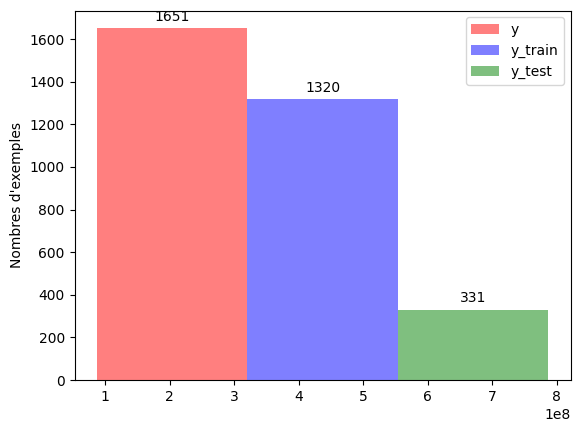

In [33]:
n, bins, patches = plt.hist([y, y_train, y_test], color=['r','b', 'g'], alpha=0.5, label = ('y', 'y_train', 'y_test'),bins= 1,)

plt.ylabel("Nombres d'exemples")
for i in range(len(patches[0])):
    plt.annotate(str(int(n[0][i])), xy=(patches[0][i].get_x() + patches[0][i].get_width() / 2, patches[0][i].get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for i in range(len(patches[1])):
    plt.annotate(str(int(n[1][i])), xy=(patches[1][i].get_x() + patches[1][i].get_width() / 2, patches[1][i].get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
for i in range(len(patches[2])):
    plt.annotate(str(int(n[2][i])), xy=(patches[2][i].get_x() + patches[2][i].get_width() / 2, patches[2][i].get_height()),
             xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
plt.legend()
plt.show()

# Standardisation

In [34]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Régression Linéaire

In [37]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_sc, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_sc)
y_pred_train = regr.predict(X_train_sc)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination x_test: %.2f" % r2_score(y_test, y_pred))
print("Coefficient of determination x_train: %.2f" % r2_score(y_train, y_pred_train))

Coefficients: 
 [ 6.86974542e+05  2.11989997e+06  9.93181797e+06  2.53515062e+06
  1.93739127e+06  2.24299864e+06  1.15538725e+06  1.44984545e+06
  2.31216345e+07  5.51503188e+06  8.76068063e+03 -1.12632980e+05
  1.10571614e+07]
Mean squared error: 101348238989630.48
Coefficient of determination x_test: 0.82
Coefficient of determination x_train: 0.85
